In [1]:
from controller import Imager
import time
import cv2
import polanalyser as pa
from PIL import Image
import matplotlib.pyplot as plt
from mpldatacursor import datacursor
import numpy as np
import os

In [2]:
imager = Imager()

Found 2 devices
Devices IDs - ['101934', '192900073']


In [3]:
exposure=20000

imager.cams[-1].remote_device.node_map.ExposureAuto.value = 'Off'
PIXELFORMATS = {'8':'Mono8','12':'Mono12Packed'}
PIXELFORMAT = PIXELFORMATS['8']
imager.update_params(ExposureTime=exposure, PixelFormat=PIXELFORMAT)

In [4]:
imager._start_acquisitions()
#imager._stop_acquisitions()

0 - 2021-10-18 18:29:53.569462 - 101934 captured Mono8 image 
0 - 2021-10-18 18:29:53.569462 - 192900073 captured Mono8 image 


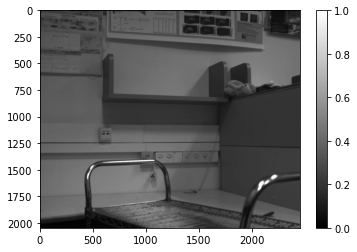

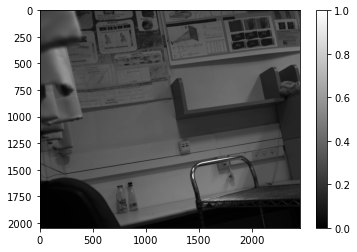

In [5]:
init_image = imager.capture_sequence(1, 0,0)

images = np.squeeze(np.array(init_image[0]))
for im in images:
    im = np.squeeze(np.array(im))
    plt.imshow(im, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
    plt.show()

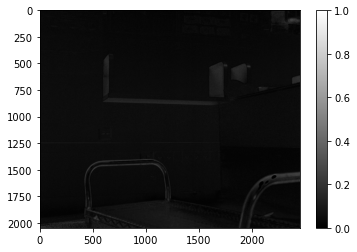

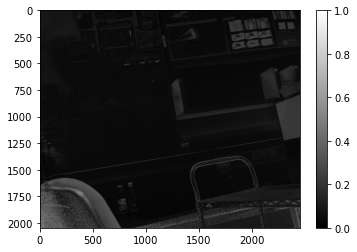

In [6]:
images = np.squeeze(np.array(init_image[0]))
for im in images:
    im = np.squeeze(np.array(im))
    img_demosaiced = pa.demosaicing(im)
    img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced)
    Stokes =  pa.calcLinearStokes(np.moveaxis(np.array([img_0, img_45, img_90, img_135]), 0, -1),
                                  np.deg2rad([0,45,90,135]))
    I = Stokes[:, :, 0]
    DoLP = pa.cvtStokesToDoLP(Stokes)
    AoLP = (180/np.pi)*pa.cvtStokesToAoLP(Stokes)-90

    plt.imshow(DoLP, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
    plt.show()

In [25]:
num_images = 50
break_sets = 0.3 #in seconds
break_images = 0 # if == 0: 3 images are taken with no break (for repetition),
                         # then then there is a break_sets.
                         # if break_sets == break_images,
                         # there is no repetition.

raw_images, metadata = imager.capture_sequence(num_images, break_sets,break_images)

0 - 2021-10-18 12:54:54.004879 - 101934 captured Mono8 image 
1 - 2021-10-18 12:54:54.004879 - 101934 captured Mono8 image 
2 - 2021-10-18 12:54:54.242750 - 101934 captured Mono8 image 


In [35]:
experiment= 'A'
os.mkdir(experiment)


In [38]:
sub = 1
repeat = 1
directory = f"./{experiment}/r{sub}{repeat}_{exposure}"
os.mkdir(directory)
for i, nagla in enumerate(raw_images):
    os.mkdir(f"./{directory}/{i}")
    for img, met in zip(nagla, metadata[i*5:(i*5)+5]):
        np.save(f'./{directory}/{i}/{met[1].strftime("%Y_%m_%d_%H%M%S")}_{met[2]}', img)





